In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2024-06-07 17:38:22--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 108.177.121.102, 108.177.121.139, 108.177.121.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-06-07 17:38:22--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.214.132, 2607:f8b0:4001:c54::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.214.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2024-06-07 17:38:23 (10

In [ ]:
df_hw = pd.read_csv('weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

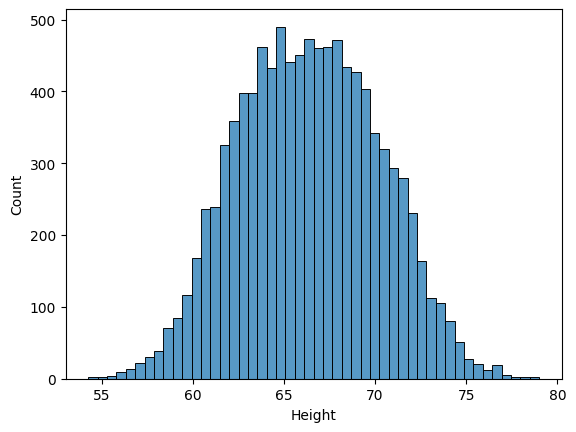

In [ ]:
sns.histplot(data = df_hw ,  x='Height')

In [ ]:

df_sample = df_hw['Height'].sample(500)

<Axes: xlabel='Height', ylabel='Count'>

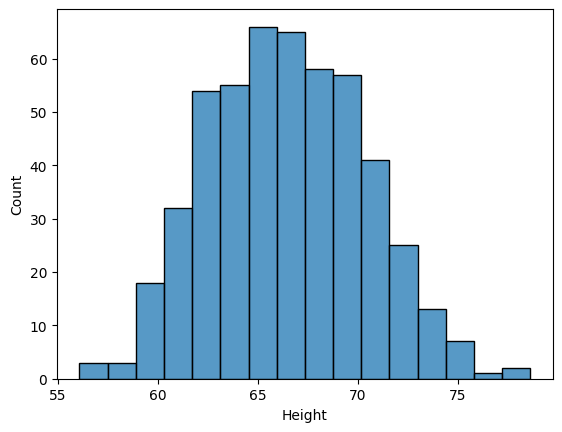

In [ ]:

sns.histplot(data=df_sample)

<Axes: xlabel='Height', ylabel='Count'>

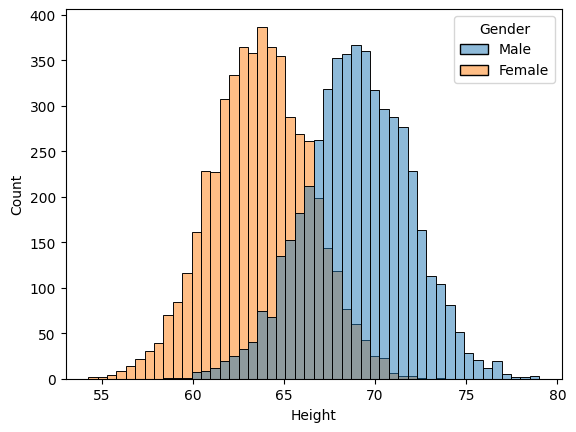

In [ ]:
sns.histplot(data=df_hw,x='Height',hue='Gender')

In [ ]:
height_men = df_hw[df_hw['Gender']=='Male']['Height']
height_women = df_hw[df_hw['Gender']=='Female']['Height']

In [ ]:
height_men.var()

8.198843252520467

In [ ]:
height_women.var()

7.2699474936701245

In [ ]:
from scipy.stats import levene

In [ ]:
#h0: variances are same
#ha: variances are not equal

In [ ]:
levene?

In [ ]:
levene_stat,p_val = levene(height_men,height_women)

In [ ]:
levene_stat,p_val #explore it

(12.284910854677701, 0.0004586349895436178)

In [ ]:
if p_val<0.05:
  print('Variance are not equal => reject ho')
else:
  print('Variance are equal')

Variance are not equal => reject ho


#two way anova testing

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-06-07 17:15:30--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 108.177.121.138, 108.177.121.139, 108.177.121.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-06-07 17:15:30--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.214.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-06-07 17:15:31 (60.6

In [ ]:
df=pd.read_csv('/content/two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
df.shape

(100, 3)

In [ ]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [ ]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [ ]:
test = ols('Sales ~ C(Flavour) * C(Location)', data=df).fit()

In [ ]:
anova_table = sm.stats.anova_lm(test,typ = 2)
print(anova_table)

                               sum_sq    df         F    PR(>F)
C(Flavour)                6919.558981   2.0  1.968465  0.145773
C(Location)               2059.273884   3.0  0.390546  0.760092
C(Flavour):C(Location)   11802.257765   6.0  1.119163  0.357804
Residual                154669.016331  88.0       NaN       NaN


#ks test

In [ ]:
#recover times of patients who took medicine 1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [ ]:
n1 = len(r1)
n2 = len(r2)
n1,n2

(100, 120)

In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
d1 = np.array(r1)
d2 = np.array(r2)

In [ ]:
sns.histplo

In [ ]:
ks_stat,p_val = stats.kstest(d1,d2)
ks_stat,p_val

(0.3233333333333333, 1.516338798228849e-05)

In [ ]:
#alpha = 0.01
if p_val > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution. accept ho")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.accept ha")

The p-value is less than or equal to 0.01, two samples have different distributions.accept ha


In [ ]:
import matplotlib.pyplot as plt

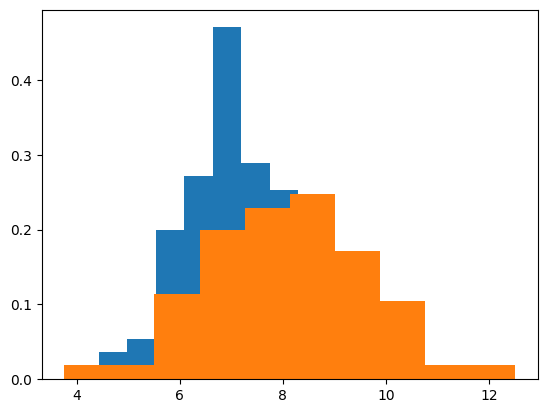

In [ ]:
a = plt.hist(d1,density = True)
b = plt.hist(d2, density = True)
plt.show()

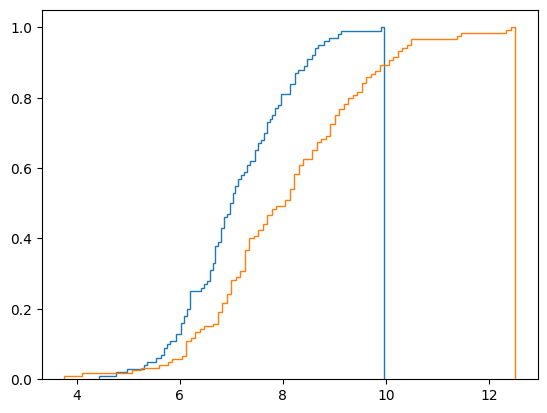

In [ ]:
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
stats.kstest?